# **Milestone 1: Requirements & Data Preparation**

In [ ]:
# 📌 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [ ]:
# 📌 Step 2: Load dataset
data = pd.read_csv(r"C:\Users\ishwa\OneDrive\Desktop\AI PriceOptima\archive (6)\dynamic_pricing.csv")
print("Data Shape:", data.shape)
data.head()

Data Shape: (1000, 10)


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [ ]:
# -------------------------------
# Check for Duplicate Rows
# -------------------------------
# Count duplicate rows
duplicates = data.duplicated().sum()

print(f"🔹 Number of duplicate rows: {duplicates}")

# Show duplicate rows if any
if duplicates > 0:
    print("\nDuplicate rows:")
    print(data[data.duplicated()])
else:
    print("\n No duplicate rows found.")

🔹 Number of duplicate rows: 0

 No duplicate rows found.


In [ ]:
data.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [ ]:
#  Basic inspection
print("Initial shape:", data.shape)
print("\nMissing values:\n", data.isnull().sum())
print("\nData types:\n", data.dtypes)

#  Drop duplicates
data.drop_duplicates(inplace=True)

#  Clean column names (remove extra spaces, lowercase)
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

#  Handle missing values
# Example: fill numeric columns with median, categorical with mode
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)

#  Optional: remove extreme outliers for price-like columns
if 'price' in data.columns:
    upper_limit = data['price'].quantile(0.99)
    lower_limit = data['price'].quantile(0.01)
    df = data[(data['price'] <= upper_limit) & (data['price'] >= lower_limit)]

# 7️⃣ Save cleaned version
data.to_csv("cleaned_dynamic_pricing.csv", index=False)
print("\n✅ Cleaned dataset saved as cleaned_dynamic_pricing.csv")
print("New shape:", data.shape)

Initial shape: (1000, 10)

Missing values:
 Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

Data types:
 Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

✅ Cleaned dataset saved as cleaned_dynamic_pricing.csv
New shape: (1000, 10)


C:\Users\ishwa\AppData\Local\Temp\ipykernel_30224\2219548922.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\ishwa\AppData\Local\Temp\ipykernel_30224\2219548922.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [ ]:

data.shape

(1000, 10)

In [ ]:
# 1. Basic Data Information
# -------------------------------
print("🔹 First 5 rows:\n", data.head())
print("\n🔹 Dataset shape:", data.shape)
print("\n🔹 Info:")
print(data.info())
print("\n🔹 Missing values:\n", data.isnull().sum())
print("\n🔹 Summary Statistics:\n", data.describe(include="all"))

🔹 First 5 rows:
    number_of_riders  number_of_drivers location_category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  customer_loyalty_status  number_of_past_rides  average_ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  time_of_booking vehicle_type  expected_ride_duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium         

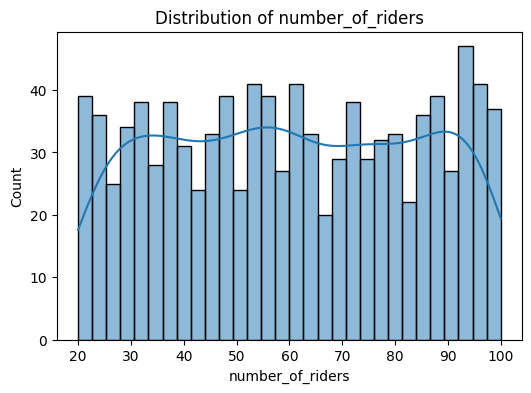

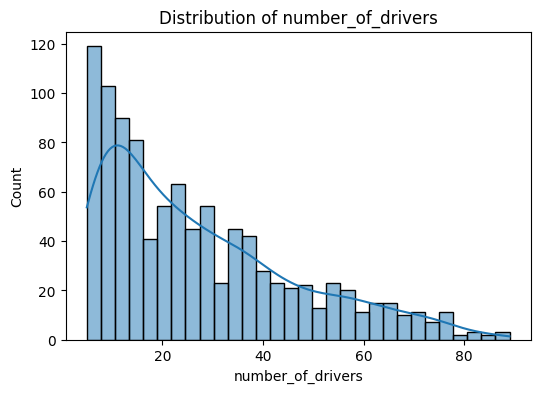

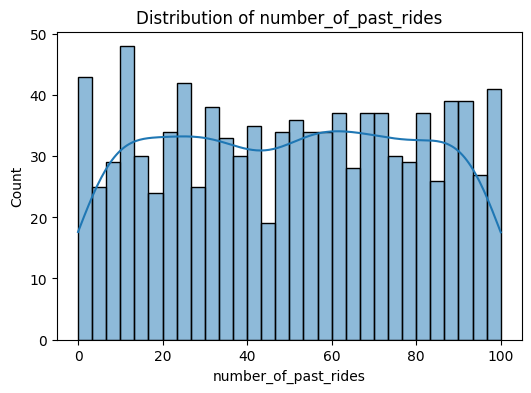

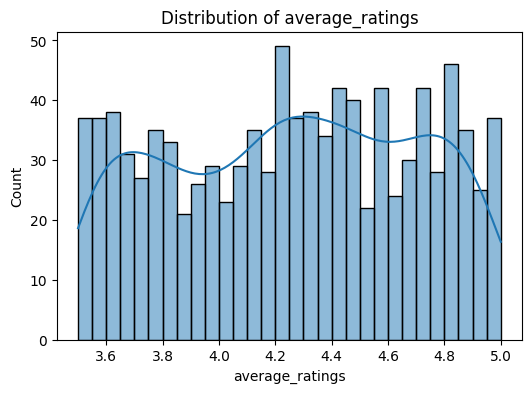

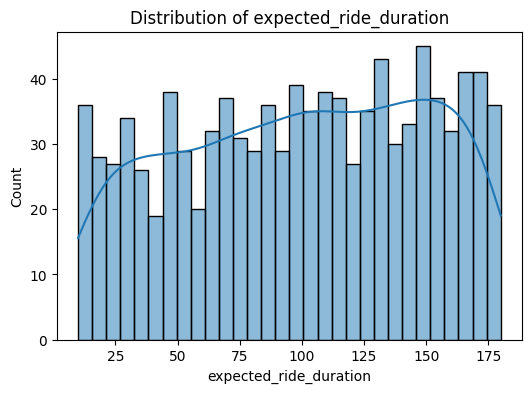

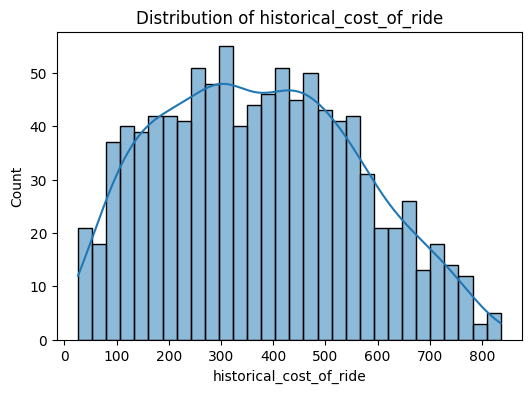

In [ ]:
#  Distribution Graphs
# -------------------------------
numeric_cols = data.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

Detected columns -> {'riders': 'number_of_riders', 'loyalty': 'customer_loyalty_status', 'vehicle': 'vehicle_type', 'cost': 'historical_cost_of_ride'}


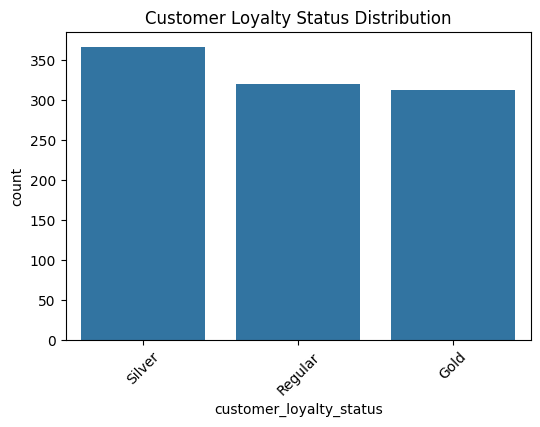

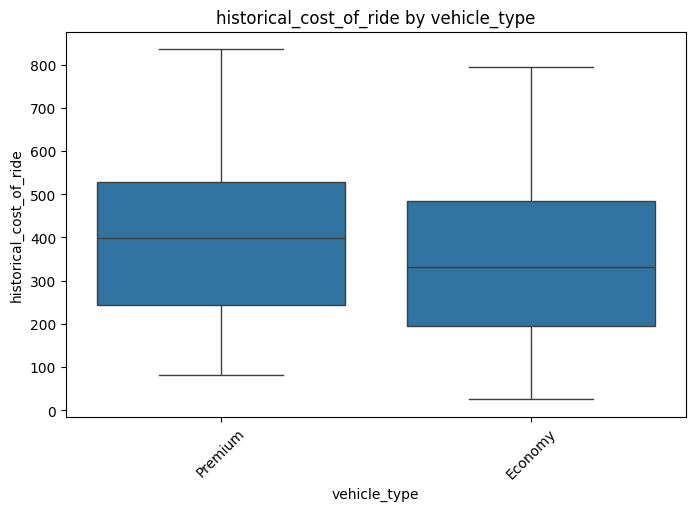

In [ ]:
# Basic Visualization (robust)
# Histogram / Count / Box plots with column auto-detection and safe casts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cols = list(data.columns)

# helper to find a best-matching column name
def find_col(cols, candidates):
    cols_lower = [c.lower() for c in cols]
    for cand in candidates:
        if cand.lower() in cols_lower:
            return cols[cols_lower.index(cand.lower())]
    for cand in candidates:
        for c in cols:
            if cand.lower() in c.lower() or c.lower() in cand.lower():
                return c
    return None

# Candidates
riders_cands = ['number_of_riders', 'num_riders', 'riders', 'ride_count', 'number of riders', 'number_of_riders']
loyalty_cands = ['customer_loyalty_status', 'customer_loyalty', 'loyalty', 'customer_type']
vehicle_cands = ['vehicle_type', 'vehicle', 'veh_type']
cost_cands = ['historical_cost_of_ride', 'historical_cost', 'cost_of_ride', 'fare', 'price']

riders_col = find_col(cols, riders_cands)
loyalty_col = find_col(cols, loyalty_cands)
vehicle_col = find_col(cols, vehicle_cands)
cost_col = find_col(cols, cost_cands)

print('Detected columns ->', {'riders': riders_col, 'loyalty': loyalty_col, 'vehicle': vehicle_col, 'cost': cost_col})


# Countplot: Customer Loyalty
if loyalty_col and loyalty_col in data.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=loyalty_col, data=data)
    plt.title("Customer Loyalty Status Distribution")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⚠️ Could not detect a customer loyalty column. Available columns:\n", cols)

# Boxplot: Vehicle Type vs Cost of Ride
if vehicle_col and cost_col and vehicle_col in data.columns and cost_col in data.columns:
    # ensure cost is numeric
    data[cost_col] = pd.to_numeric(data[cost_col], errors='coerce')
    plt.figure(figsize=(8,5))
    sns.boxplot(x=vehicle_col, y=cost_col, data=data)
    plt.title(f"{cost_col} by {vehicle_col}")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⚠️ Could not detect both vehicle and cost columns for the boxplot.")
    print('Suggested vehicle column:', vehicle_col)
    print('Suggested cost column:', cost_col)
    print('Available columns:', cols)


In [ ]:
#  Outlier Detection - IQR
# -------------------------------
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] < lower) | (data[col] > upper)]

for col in numeric_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

number_of_riders: 0 outliers
number_of_drivers: 10 outliers
number_of_past_rides: 0 outliers
average_ratings: 0 outliers
expected_ride_duration: 0 outliers
historical_cost_of_ride: 0 outliers


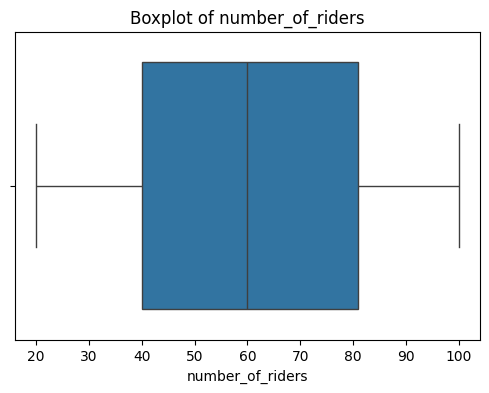

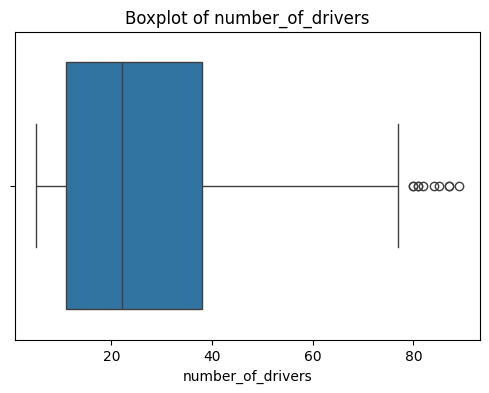

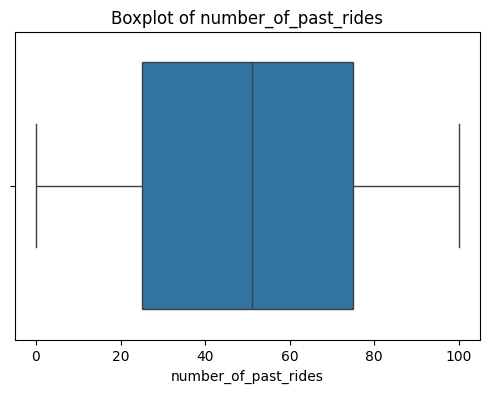

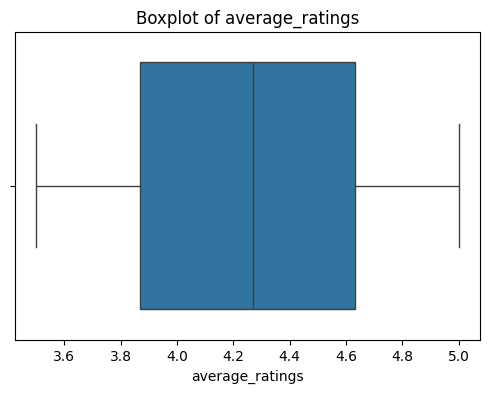

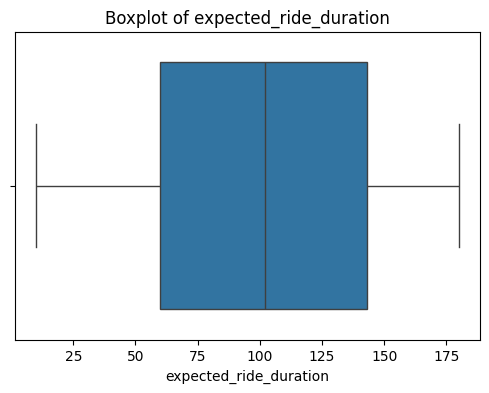

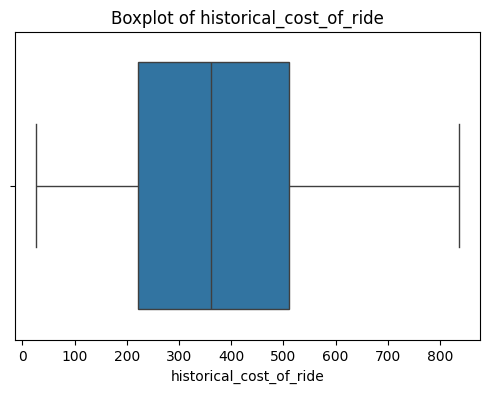

In [ ]:
#  Boxplots for all numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

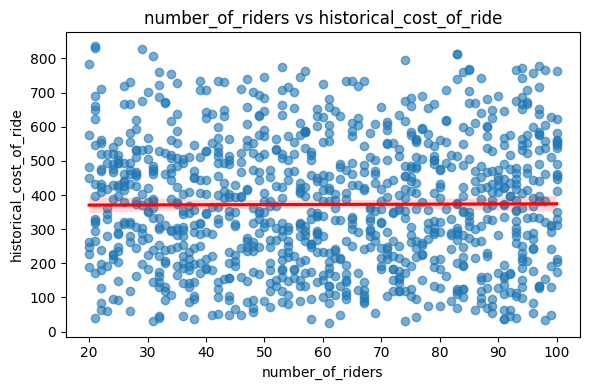

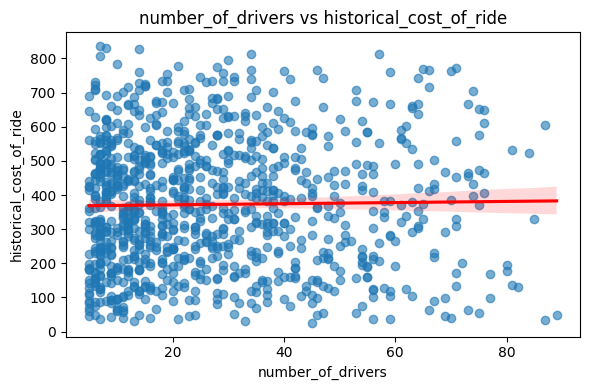

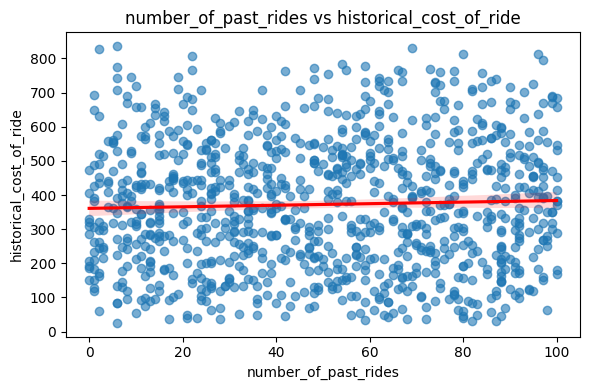

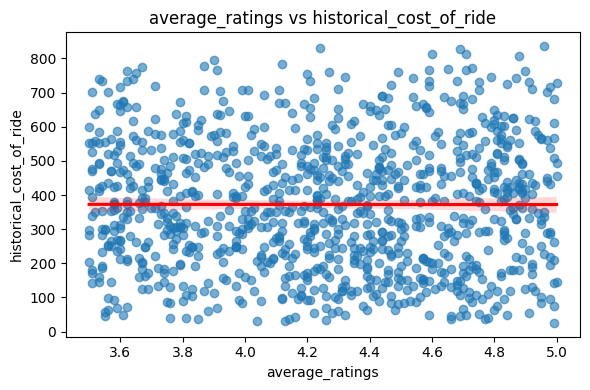

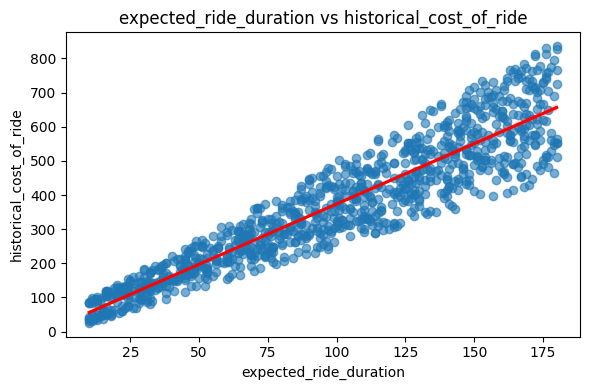

In [ ]:
# Linearity Check (Scatterplots + Regression Lines)
# -------------------------------------------------
target = numeric_cols[-1]  # assuming last numeric column is the target

for col in numeric_cols[:-1]:
    plt.figure(figsize=(6, 4))
    
    # Scatter + regression line in one go
    sns.regplot(x=data[col], y=data[target], scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
    
    plt.title(f"{col} vs {target}")
    plt.xlabel(col)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()


In [ ]:
# Check available columns in data
print("Available columns:", data.columns.tolist())

Available columns: ['number_of_riders', 'number_of_drivers', 'location_category', 'customer_loyalty_status', 'number_of_past_rides', 'average_ratings', 'time_of_booking', 'vehicle_type', 'expected_ride_duration', 'historical_cost_of_ride']


In [ ]:
data.head()

,number_of_riders,number_of_drivers,location_category,customer_loyalty_status,number_of_past_rides,average_ratings,time_of_booking,vehicle_type,expected_ride_duration,historical_cost_of_ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [ ]:
# Summary Statistics
# -------------------

# Numeric features summary
print("\n=== Summary Statistics (Numeric) ===")
print(data.describe())

# Categorical features summary (before encoding)
cat_cols = ["location_category", "customer_loyalty_status", "time_of_booking", "vehicle_type"]

print("\n=== Summary Statistics (Categorical) ===")
for col in cat_cols:
    print("\n" + "-"*60)
    print(f"Value counts for '{col}':")
    print(data[col].value_counts())
    print("-"*60)





=== Summary Statistics (Numeric) ===
       number_of_riders  number_of_drivers  number_of_past_rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       average_ratings  expected_ride_duration  historical_cost_of_ride  
count      1000.000000              1000.00000              1000.000000  
mean          4.257220                99.58800               372.502623  
std           0.435781                49.16545               187.158756  
min           3.500000                10.00000       

In [ ]:
# Encoding 
# -------------------------------
print("Data before encoding:\n", data.head())

categorical_cols = data.select_dtypes(include=["object"]).columns

# 🔹 Label Encoding
le = LabelEncoder()
data_label_encoded = data.copy()
for col in categorical_cols:
    data_label_encoded[col] = le.fit_transform(data_label_encoded[col])

print("\n Label Encoding applied.")
print("Data after Label Encoding:\n", data_label_encoded.head())

Data before encoding:
    number_of_riders  number_of_drivers location_category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  customer_loyalty_status  number_of_past_rides  average_ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  time_of_booking vehicle_type  expected_ride_duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium   

In [ ]:
# 🔹 One-Hot Encoding
data_onehot_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
print("\n One-Hot Encoding applied.")
print("Data after One-Hot Encoding:\n", data_onehot_encoded.head())



 One-Hot Encoding applied.
Data after One-Hot Encoding:
    number_of_riders  number_of_drivers  number_of_past_rides  average_ratings  \
0                90                 45                    13             4.47   
1                58                 39                    72             4.06   
2                42                 31                     0             3.99   
3                89                 28                    67             4.31   
4                78                 22                    74             3.77   

   expected_ride_duration  historical_cost_of_ride  \
0                      90               284.257273   
1                      43               173.874753   
2                      76               329.795469   
3                     134               470.201232   
4                     149               579.681422   

   location_category_Suburban  location_category_Urban  \
0                       False                     True   
1             

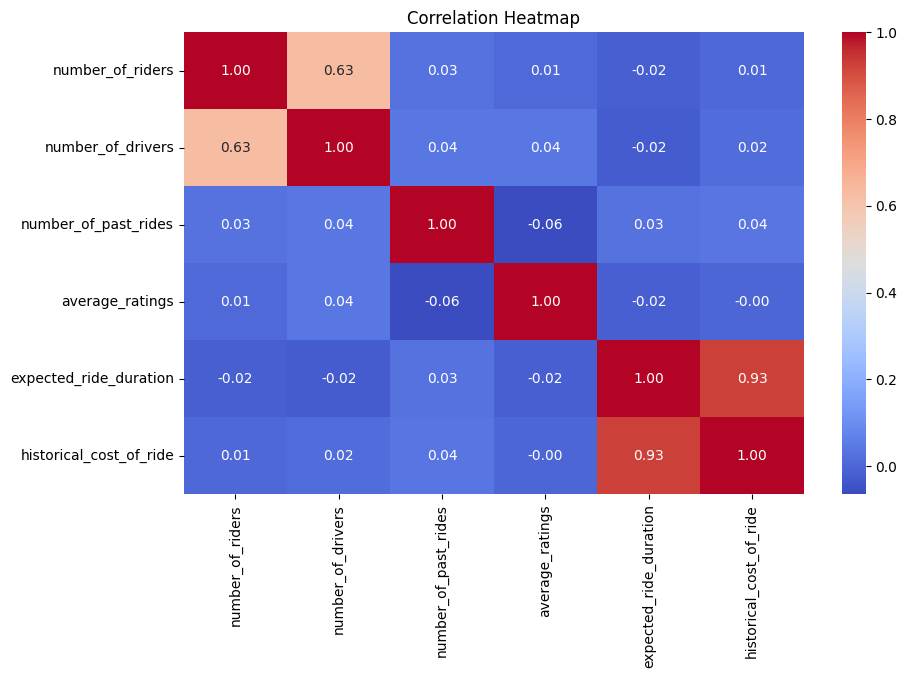

In [ ]:
#  Correlation Heatmap
# -------------------------------
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr().dropna(axis=0, how='all').dropna(axis=1, how='all')
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()